In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Data loading

dataset = pd.read_csv('/content/drive/MyDrive/Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
dataset = dataset.drop([0, 1, 2, 3, 504], axis=1)
dataset.columns = list(range(500))
dataset.head()


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,14820,14823,14824,14822,14818,14820,14824,14822,14820,14820,...,14828,14822,14815,14815,14817,14819,14820,14822,14820,14819
1,14820,14822,14820,14826,14824,14822,14820,14822,14823,14821,...,14828,14817,14824,14822,14824,14819,14820,14819,14822,14820
2,14820,14820,14822,14825,14820,14824,14824,14819,14823,14824,...,14820,14821,14820,14820,14818,14821,14823,14820,14820,14821
3,14828,14822,14818,14824,14824,14822,14820,14822,14824,14820,...,14824,14826,14822,14821,14820,14828,14820,14822,14823,14822
4,14823,14815,14823,14821,14827,14820,14823,14824,14816,14821,...,14820,14820,14823,14828,14824,14820,14824,14824,14822,14825


In [ ]:
dataset.shape

(23479, 500)

In [ ]:
amp =  dataset.max(axis=1) - dataset.min(axis=1)
amp = np.array(amp)

Text(0, 0.5, 'bit ADC')

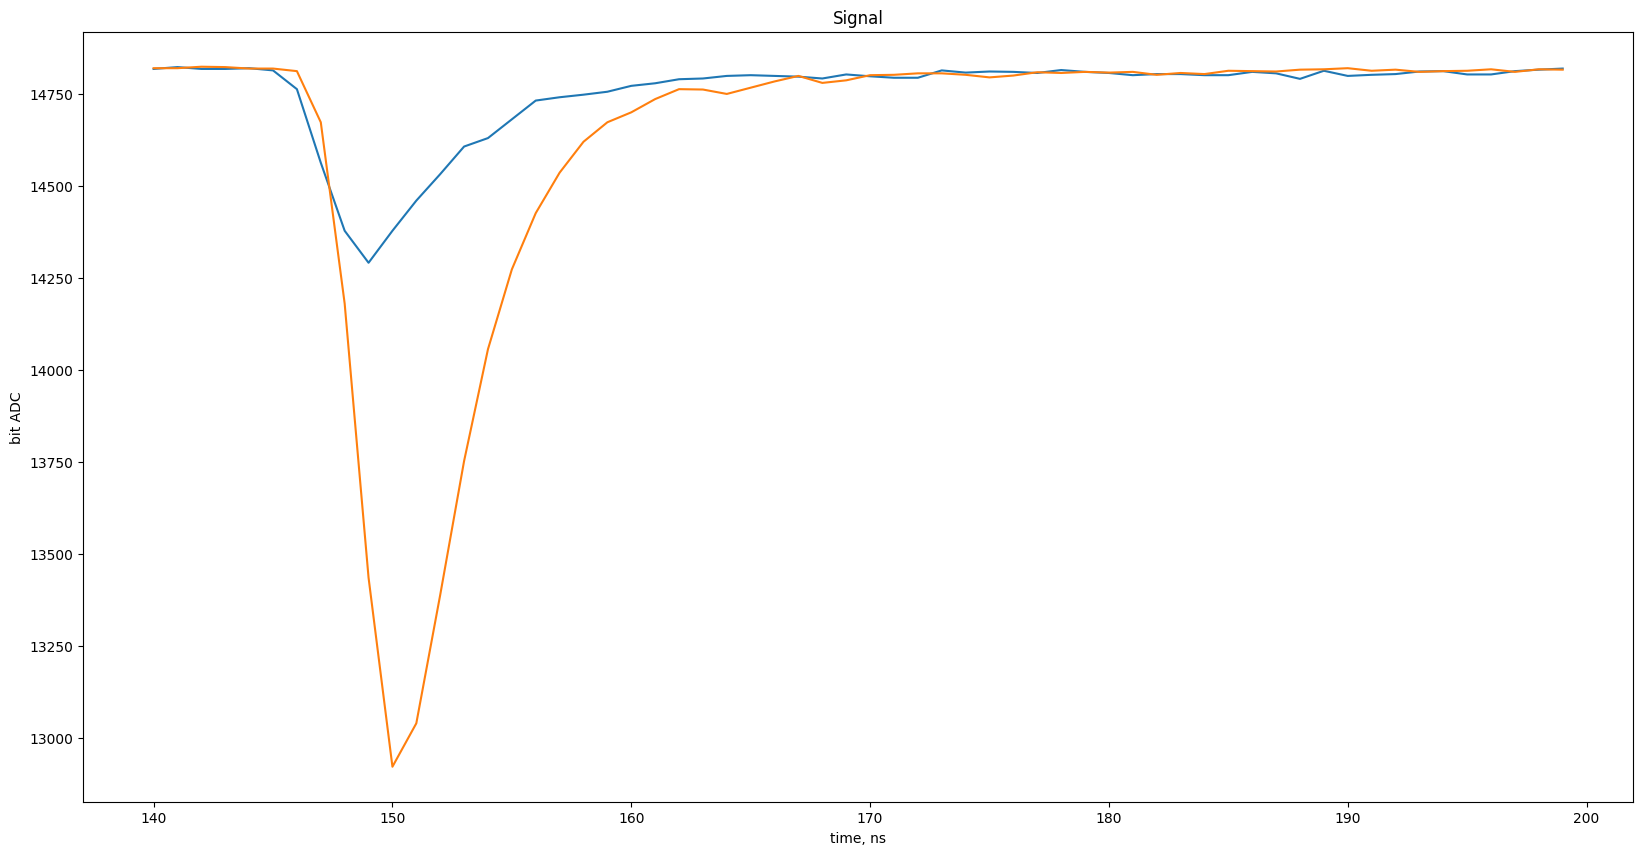

In [ ]:
N=range(0,2)
ax = dataset.T[N][140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

Text(0, 0.5, 'bit ADC')

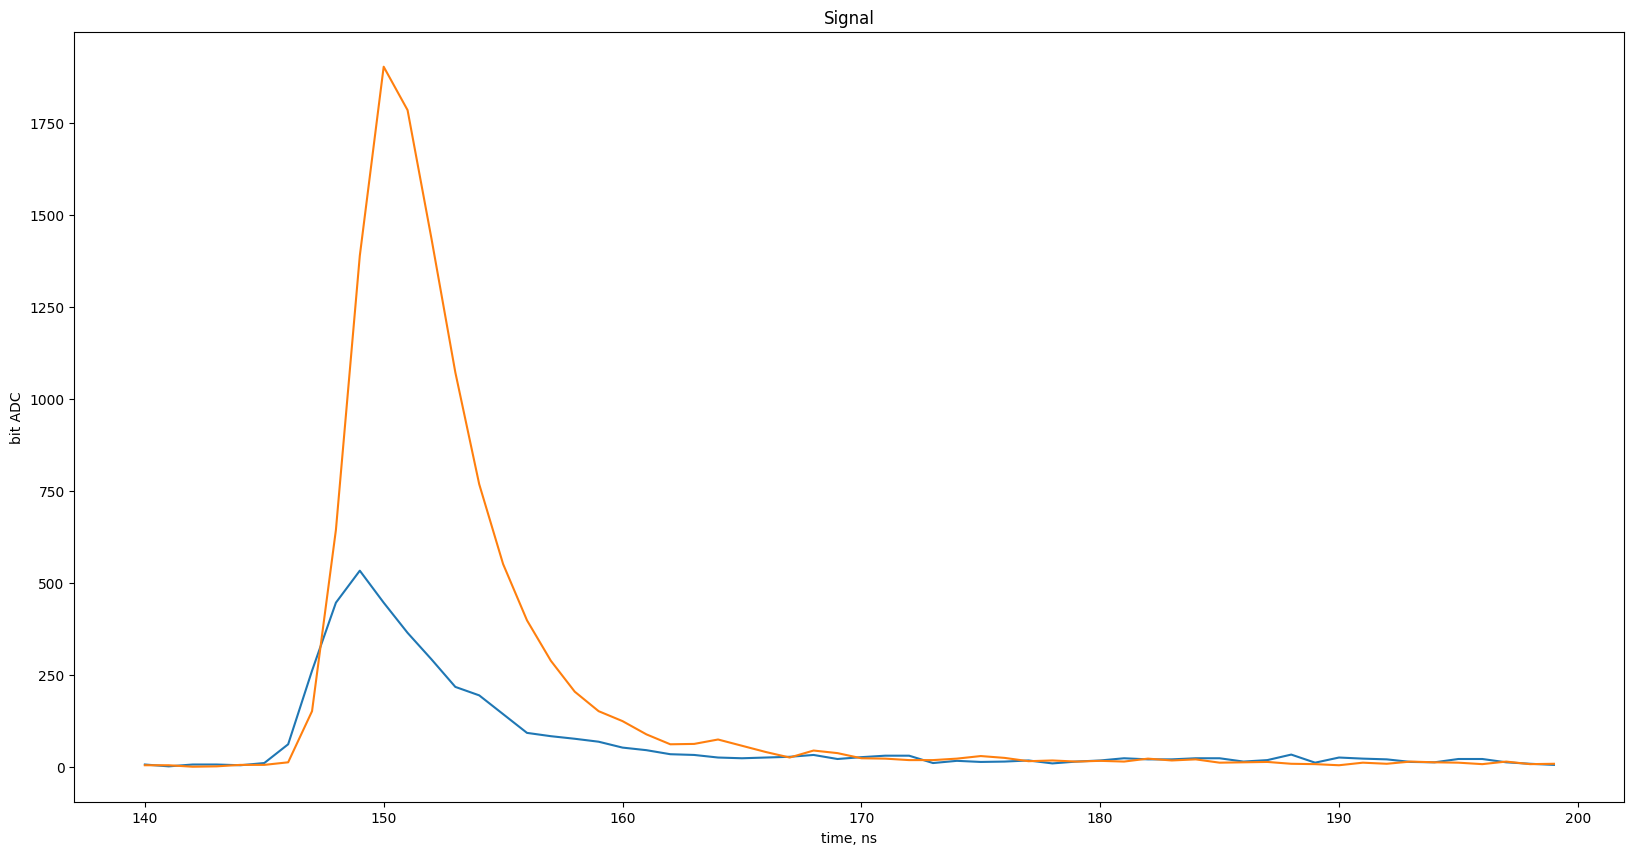

In [ ]:
ax = (2**14-dataset.T[N]-1560)[140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")


In [ ]:
def trapez(x, y):
    area = 0
    for i in range(len(x) - 1):
        area += (x[i+1] - x[i]) * (y[i+1] + y[i]) / 2
    return area

In [ ]:
area = []
for i in range(23479):
  y = np.array((2**14-dataset.T[i]-1560)[140:200])
  x = np.array(range(len(y)))
  now_area = trapez(x, y)
  area.append(now_area)


Text(0.5, 1.0, 'Диаграмма рассеяния')

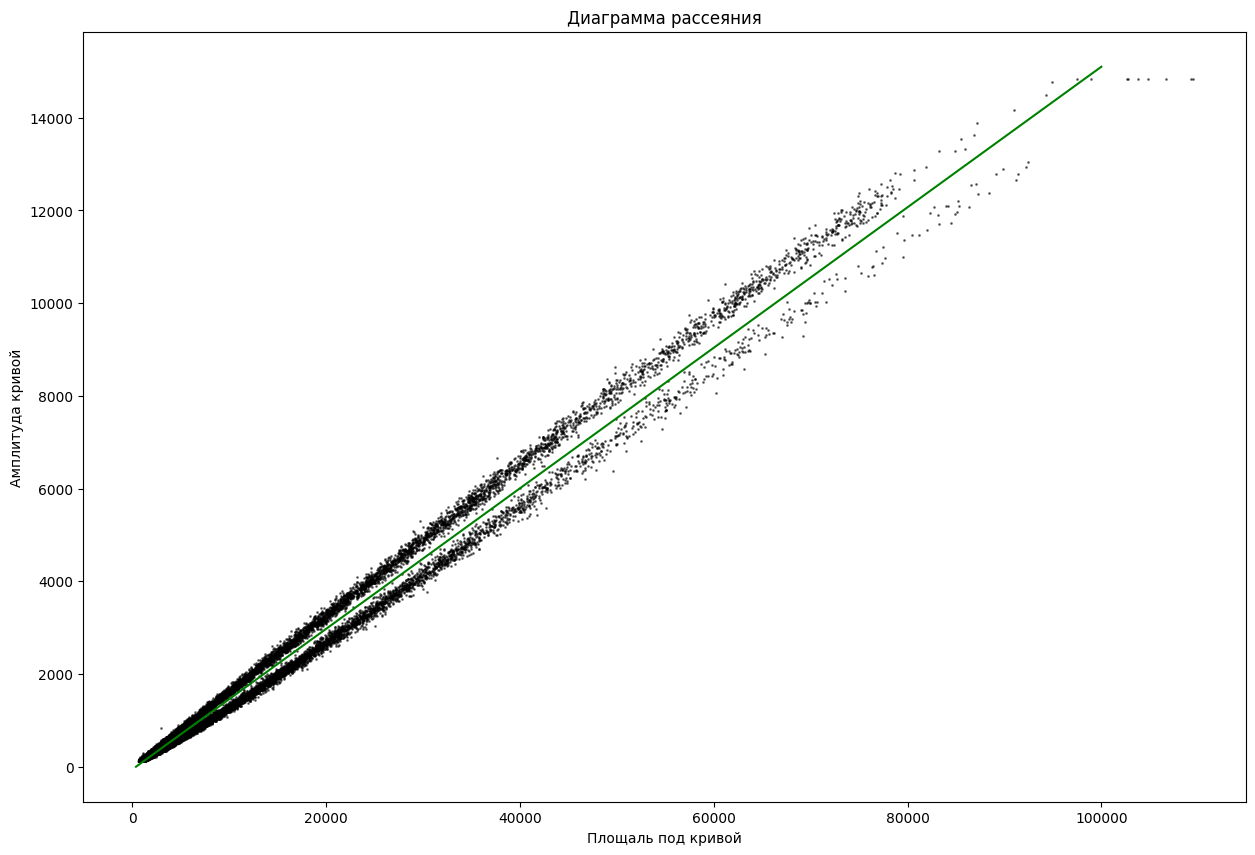

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(area, amp, s=1, c='black', marker='o', alpha=0.5)
x_l = [400, 100000]
y_l = [0, 15100]
plt.plot(x_l, y_l, c='green')
plt.xlabel("Площаль под кривой")
plt.ylabel("Амплитуда кривой")
plt.title(f'Диаграмма рассеяния')

In [ ]:
# получается тангенс 0.1485

In [ ]:
'''
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Объединяем x и y в массив для DBSCAN
X = np.column_stack((area, amp))

# Создание модели DBSCAN.  eps и min_samples - параметры, которые нужно настраивать

# Обучение модели
dbscan.fit(X)

# Получение меток кластеров
labels = dbscan.labels_

# Маска для выделения центральных точек кластеров
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Уникальные метки кластеров (исключая шум)
unique_labels = set(labels)
# Генерируем цвета для кластеров
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Точки шума (не принадлежат ни к одному кластеру)
        col = 'k'  # черный цвет

    class_member_mask = (labels == k)

    # Рисуем центральные точки кластеров
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    # Рисуем остальные точки кластеров
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Вывод меток кластеров для каждой точки
print("Метки кластеров:", labels)
print("Количество кластеров:", len(unique_labels) - (1 if -1 in labels else 0)) #исключаем шум


'''

NameError: name 'dbscan' is not defined

Кластер 1: 20313 точек
Кластер 0: 3166 точек


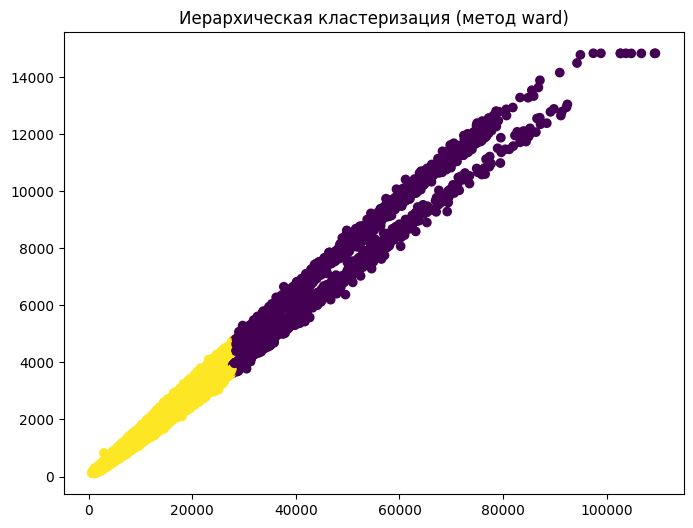


Метки кластеров: [1 1 1 ... 0 1 0]


In [ ]:
'''import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from collections import Counter


X = np.column_stack((area, amp))



# Иерархическая кластеризация с методом ward
agglomerative_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')

# Обучаем модель
labels = agglomerative_clustering.fit_predict(X)

# Подсчет количества точек в каждом кластере
cluster_counts = Counter(labels)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Иерархическая кластеризация (метод ward)')

#Вывод количества точек в каждом кластере
for cluster_label, count in cluster_counts.items():
    print(f"Кластер {cluster_label}: {count} точек")

plt.show()

#Выведем метки кластеров
print("\nМетки кластеров:", labels)
'''

In [ ]:
'''import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler



# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Иерархическая кластеризация с методом average
agglomerative_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')

# Обучаем модель
labels = agglomerative_clustering.fit_predict(X_scaled)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Иерархическая кластеризация (метод average, данные масштабированы)')
plt.show()
'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Заданная прямая
A = 0.1495
B = -1
X = np.column_stack((area, amp))


# Вычисление расстояний до прямой
distances = (A * X[:, 0] + B * X[:, 1] + 300) / np.sqrt(A**2 + B**2)


kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(distances.reshape(-1, 1)) # reshape для одномерных данных
kmeans_labels = kmeans.labels_

# Кластеризация по пороговому значению
threshold = np.mean(distances) #пример порогового значения, может потребовать подбора
threshold_labels = np.where(distances < threshold, 0, 1)

# Визуализация
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(area, amp, c=kmeans_labels, cmap='viridis', s=10)
plt.title('KMeans Clustering (по расстоянию)')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(area, amp, c=threshold_labels, cmap='viridis', s=10)
plt.title('Кластеризация порогом')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()




In [ ]:
plt.figure(figsize=(17, 8))
plt.scatter(area, amp, c=kmeans_labels, cmap='viridis', s=0.1)
plt.title('KMeans Clustering (по расстоянию)')
plt.xlabel('x')
plt.ylabel('y')

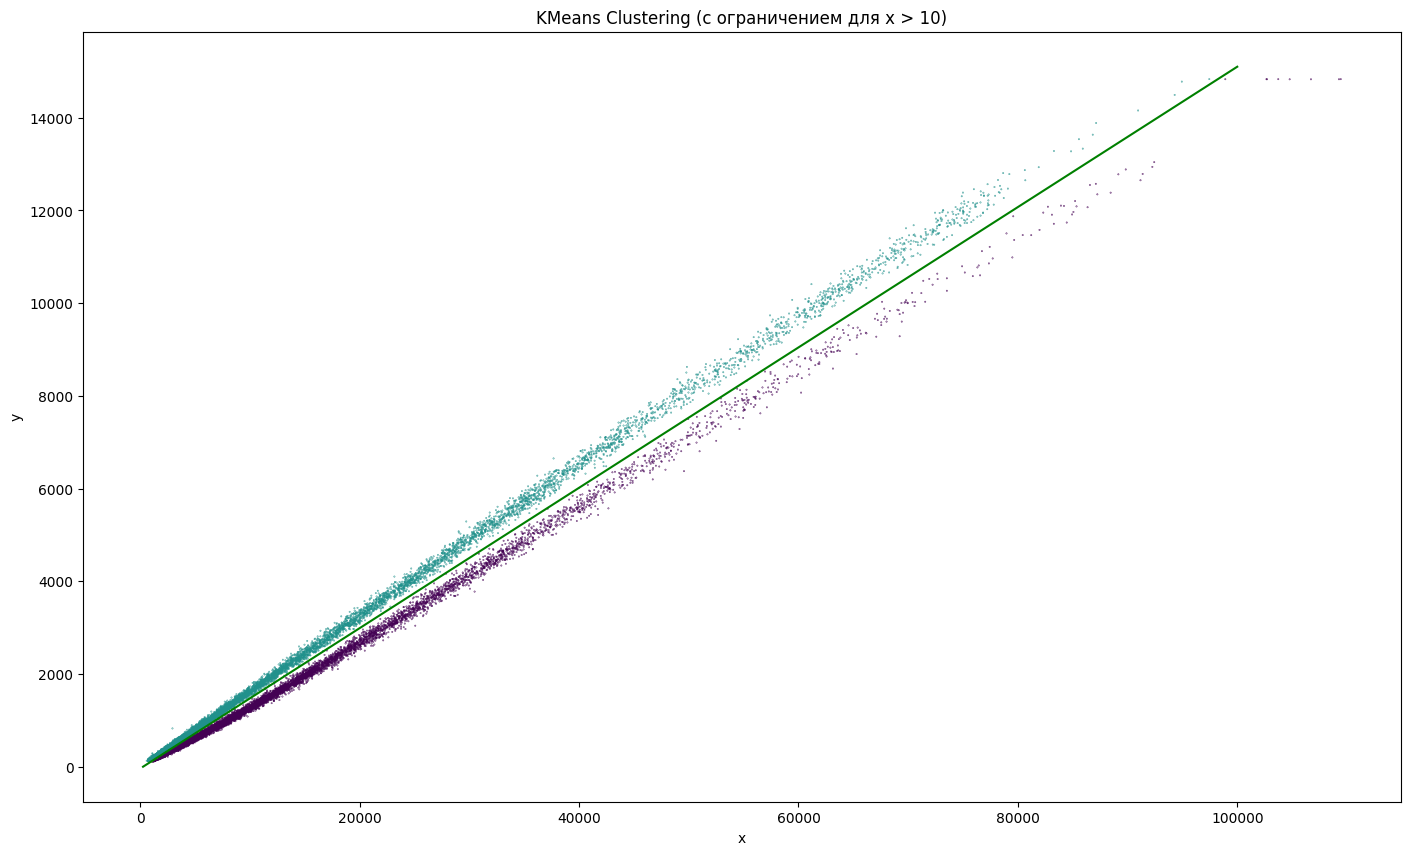

Список принадлежностей к кластерам [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
'''import numpy as np
import matplotlib.pyplot as plt

# Заданная прямая 0.151(x - 400)- y = 0
A = 0.151
B = -1
C = 250
X = np.column_stack((area, amp))

# Вычисление расстояний до прямой СО ЗНАКОМ
distances = (A * (X[:, 0] - C) + B * X[:, 1]) / np.sqrt(A**2 + B**2)

# Кластеризация KMeans на основе расстояний (пример с 3 кластерами)
"""kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(distances.reshape(-1, 1))
kmeans_labels = kmeans.labels_ц
"""

"""# Коррекция меток для точек с x > 10000
for i in range(len(area)):
    if area[i] > 10000:
        kmeans_labels[i] = np.clip(kmeans_labels[i], 1, 0)"""

dist_0 = np.array([])
dist_1 = np.array([])
labels = np.array([])

p = 2
for i in range(len(distances)):
  if  abs(distances[i]) < p:
    labels = np.append(labels, 2)
  elif distances[i] > 0:
    labels = np.append(labels, 0)
  else:
    labels = np.append(labels, 1)



plt.figure(figsize=(17, 10))
x_l = [250, 100000]
y_l = [0, 15100]
plt.plot(x_l, y_l, c='green')
plt.scatter(area, amp, c=labels, cmap='viridis', s=0.1)
plt.title('KMeans Clustering (с ограничением для x > 10)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Список принадлежностей к кластерам", labels.tolist())

print(np.sum(labels == 2), np.sum(labels == 1), np.sum(labels == 0))
labels = labels.astype(np.int32)'''

In [ ]:
X = np.column_stack((area, amp))
X_centered = X - np.mean(X, axis=0)

# Ковариационная матрица
cov_matrix = np.cov(X_centered.T)

# Собственные значения и собственные векторы
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Главный вектор (направление)
principal_vector = eigenvectors[:, np.argmax(eigenvalues)] # выбираем по максимальному собственному значению

# Определение уравнения прямой
# Проходоля через центр данных и направлений главного вектора
origin = np.mean(X, axis=0)
direction = principal_vector
print(direction)
print(origin)

[0.98815833 0.15343767]
[12357.08663061  1842.8495677 ]


Text(0.5, 1.0, 'Диаграмма рассеяния')

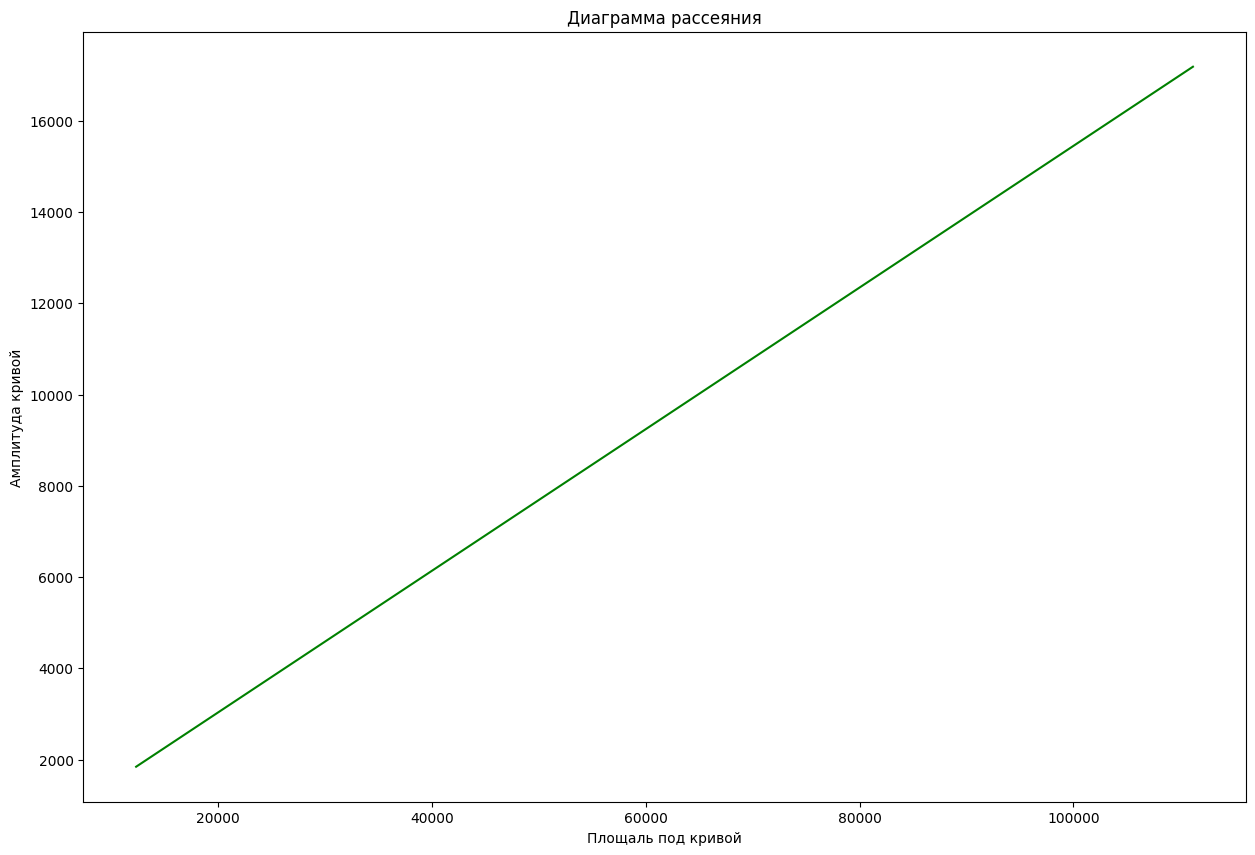

In [ ]:
plt.figure(figsize=(15,10))
#plt.scatter(area, amp, s=1, c='black', marker='o', alpha=0.5)
x_l = [origin[0], origin[0] + 100000 * direction[0]]
y_l = [origin[1], origin[1] + 100000 * direction[1]]
plt.plot(x_l, y_l, c='green')
plt.xlabel("Площаль под кривой")
plt.ylabel("Амплитуда кривой")
plt.title(f'Диаграмма рассеяния')

In [ ]:
tang = direction[1]/direction[0] #  tg наклона прямой
tang

0.1552764041525404

In [ ]:
x0 = origin[0] - origin[1] / tang

488.8985581387569

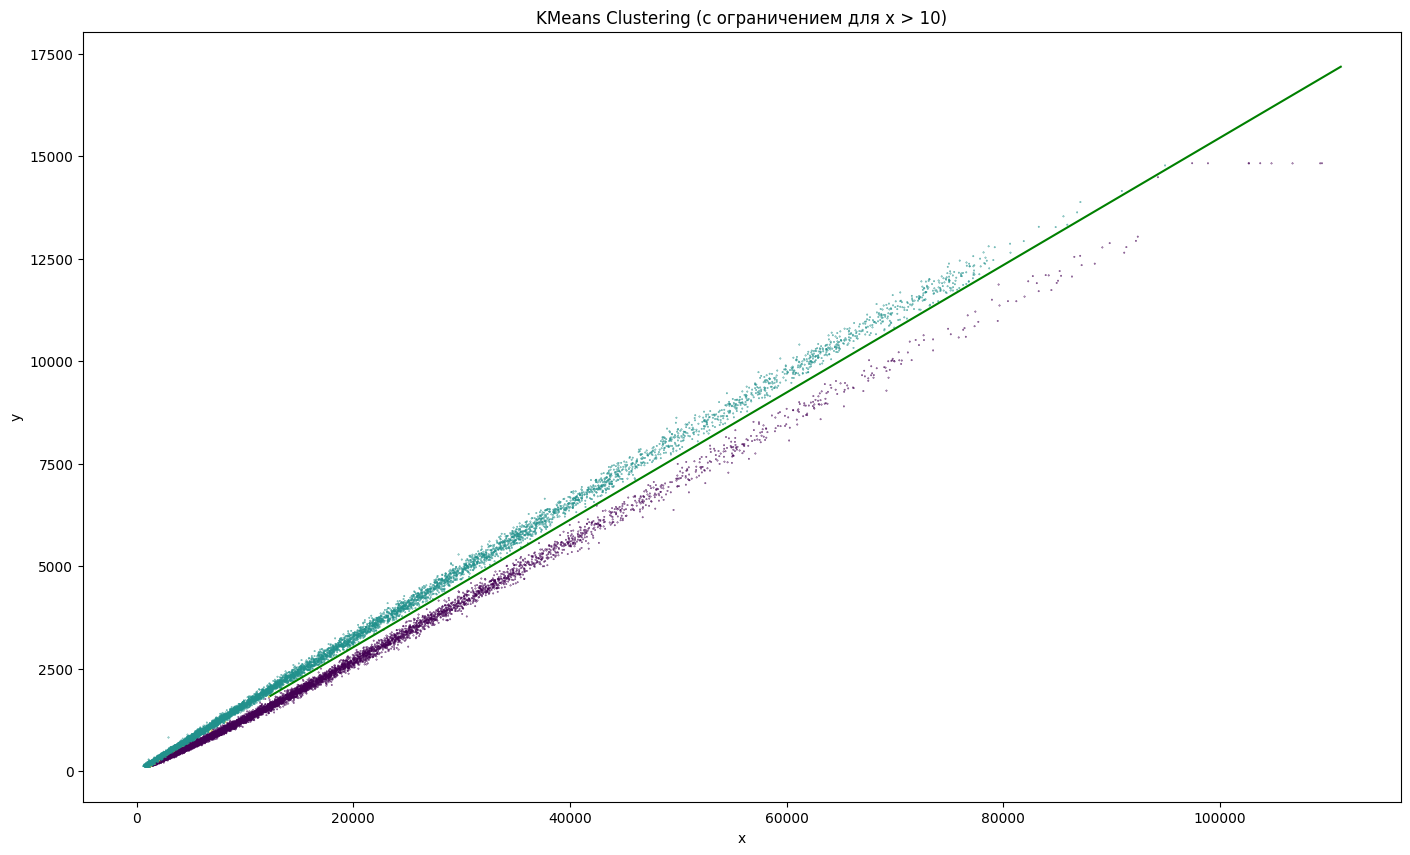

Список принадлежностей к кластерам [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.column_stack((area, amp))

A = tang
B = -1
# Вычисление расстояний до прямой СО ЗНАКОМ
distances = (A * (X[:, 0] - x0) + B * X[:, 1]) / np.sqrt(A**2 + B**2)


dist_0 = np.array([])
dist_1 = np.array([])
labels = np.array([])

p = 2
for i in range(len(distances)):
  if  abs(distances[i]) < p:
    labels = np.append(labels, 2)
  elif distances[i] > 0:
    labels = np.append(labels, 0)
  else:
    labels = np.append(labels, 1)



plt.figure(figsize=(17, 10))
x_l = [origin[0], origin[0] + 100000 * direction[0]]
y_l = [origin[1], origin[1] + 100000 * direction[1]]
plt.plot(x_l, y_l, c='green')
plt.scatter(area, amp, c=labels, cmap='viridis', s=0.1)
plt.title('KMeans Clustering (с ограничением для x > 10)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Список принадлежностей к кластерам", labels.tolist())

print(np.sum(labels == 2), np.sum(labels == 1), np.sum(labels == 0))
labels = labels.astype(np.int32)

In [ ]:
labels = pd.DataFrame(labels)

labels.index.name = 'index'
labels.columns = ['cluster']
#вшкlabels = labels.sort_values(by='cluster')
labels

,cluster
index,
0,0
1,1
2,1
3,0
4,1
...,...
23474,1
23475,0
23476,0


In [ ]:
#kmeans_labels.to_csv("answer.csv", index=True)
labels.to_csv("answer.csv", index=True)


In [ ]:
# Метод главных компанент

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X = dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

n_components = 500 # Замените на оптимальное число компонент
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)
labels = kmeans.labels_

print(labels)


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(area, amp, c=labels, cmap='viridis', s=0.1)
plt.title('')
plt.xlabel('x')
plt.ylabel('y')
plt.show()